## 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [1]:
import pandas as pd
df = pd.read_csv("./diabetes.csv")
df=df.drop('Outcome',axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [2]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [3]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

# 원 핫 인코딩

In [4]:
Y = pd.get_dummies(y).values

# Numpy 변환

In [5]:
X = X.values

In [6]:
X.shape

(768, 7)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [9]:
import numpy as np
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


2024-09-16 09:40:49.693149: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 1s 8ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258 - val_loss: 0.0834 - val_mse: 0.0834
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0847 - mse: 0.0847 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 8/30
20/20 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089 - val_lo

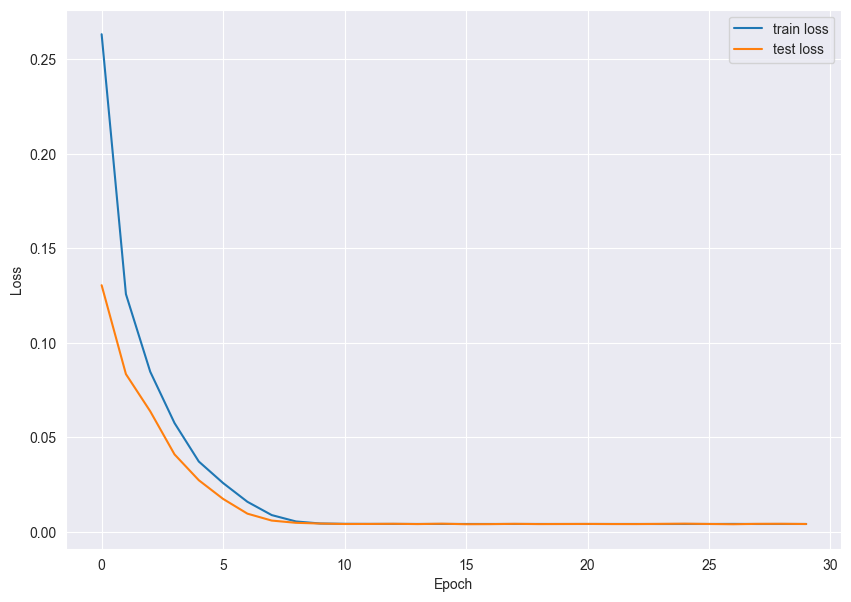

In [10]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041


[0.0041435277089476585, 0.0041435277089476585]